# Regresión lineal simple

Predicción de salarios en bae a ñaos de experiencia

In [32]:
import pandas as pd
import seaborn as sns

In [33]:
df = pd.read_csv('../dataset/salaries_experience.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


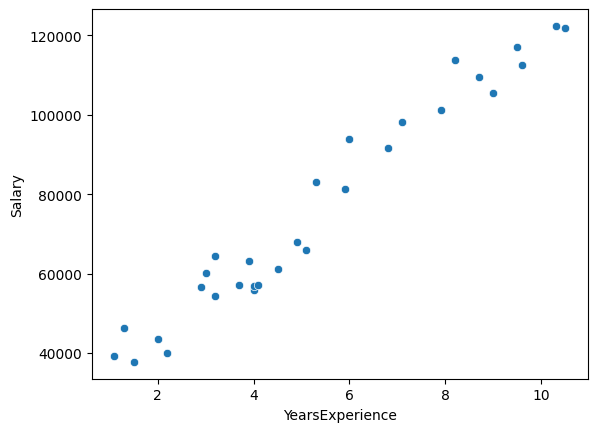

In [35]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary');

In [36]:
X = df[['YearsExperience']]
X[:3]

,YearsExperience
0,1.1
1,1.3
2,1.5


In [37]:
y = df[['Salary']]
y[:3]

,Salary
0,39343.0
1,46205.0
2,37731.0


## Entrenar y predecir

In [38]:
from sklearn.linear_model import LinearRegression

## 1. Crear modelo
model = LinearRegression()

## 2. Entrenar el modelo
model.fit(X, y)

## 3. Hacer prediciones
model.predict([[8]]) # Predicion para 9 años de experiemcia

c:\Users\bardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[101391.89877031]])

In [39]:
## Nuevos años de experiencia
X_employees = pd.DataFrame({'YearsExperience':[7.5, 4, 6, 2]})

X_employees['Salary'] = model.predict(X_employees)
X_employees


,YearsExperience,Salary
0,7.5,96666.917610
1,4.0,63592.049484
2,6.0,82491.974127
3,2.0,44692.124842


In [40]:
# Concatenar original con las predicciones
df_all = pd.concat([df,X_employees], ignore_index=True)
df_all[:4]

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0


In [41]:
X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


<Axes: xlabel='YearsExperience', ylabel='Salary'>

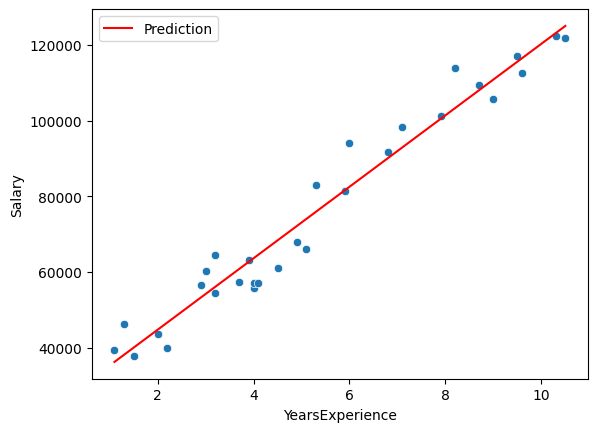

In [42]:
sns.scatterplot(data=df, x='YearsExperience', y=df['Salary'])
sns.lineplot(x=df['YearsExperience'], y=y_pred, color='r', label='Prediction')

In [43]:
df = pd.read_csv('../dataset/salaries_experience.csv')

In [44]:
X = df[['YearsExperience']] # dataframe, matriz
y = df['Salary'] # serie, vector

### Particionamiento de datos

* Entrenamiento : 80%
* Validación o test: 20%

In [45]:
from sklearn.model_selection import train_test_split
# 80% X_train , y_train
# 20% X_test , y_test
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape} {y_train.shape}")
print(f"Test: {X_test.shape} {y_test.shape}")

Entrenamiento: (24, 1) (24,)
Test: (6, 1) (6,)


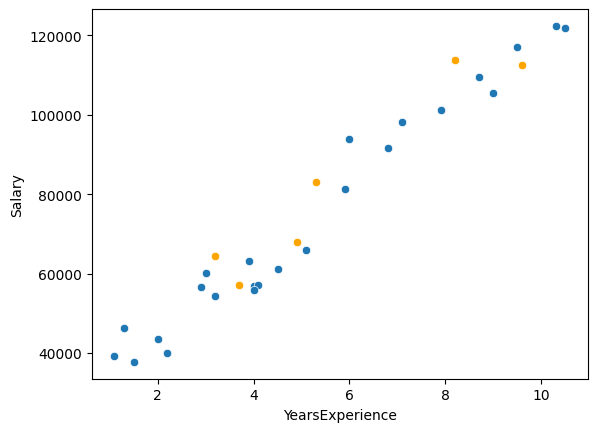

In [46]:
sns.scatterplot(x=X_train['YearsExperience'], y=y_train)
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='orange');

#### Entrenamiento...

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test) # Datos de test

<Axes: xlabel='YearsExperience', ylabel='Salary'>

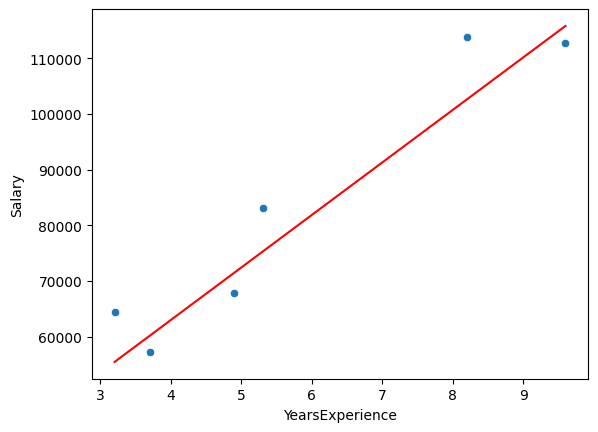

In [49]:
sns.scatterplot(x=X_test['YearsExperience'], y=y_test) # test
sns.lineplot(x=X_test['YearsExperience'], y=y_pred, c='r')# prediciones

## Error

MAE: Mean Absolute Error

mean_absolute_error

Es la media del valor absoluto de los errores entre las predicciones y los valores reales. Mide cuanto se disvían en promedio las predicciones del modelo de los valores reales.

Error = y_test-y_pred

In [56]:
from sklearn.metrics import mean_absolute_error

# Es un error .Posible margen de salario que el modelo se equivoca
# Menos cantidad mejor predicción
mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')

mae: 6286.453830757749


## Error MSE y RMSE

MSE: Mean Squared Error o Error Cuadrático Medio

* Mide la diferencia entre los valores realies y los valores predichos por el modelo.

* La diferencia con la AE es que el MSE toma la media de los cuadrados de los errores.

* MSE eleva al cuadrado los errores antes de hacer la media,lo que significa que da mas peso a los errores grandes que a los pequeños.

RMSE: Root Mean Squeare Error

* Es la raiz cuadrada del MSE, se usa para que la salida no esté elevada alcuadrado y se puede interpretar mejot.

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 49830096.85590839
rmse: 7059.04362190151
